<a href="https://colab.research.google.com/github/phong0104/SNU_GSDS_BootCamp_Ambient_AI/blob/main/HW1_2021_20818_HonggyuLee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Problem 1: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
- 조건 1 : 모델은 최소한 3개 이상의 Dense layer를 사용하여 구성
- 조건 2 : 0.4 이상의 Validation accuracy를 달성
- 조건 3 : Regularizer를 한 번 이상 활용(Dropout 제외)

In [ ]:
cifar10 = tf.keras.datasets.cifar10

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split train set into train/valid set
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

# Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

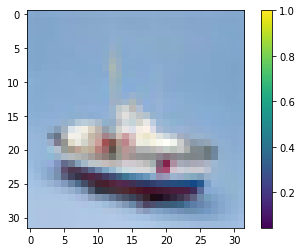

In [ ]:
# Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Activation, BatchNormalization, Input

model = tf.keras.models.Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

- Regularizer 1 : Batch Normalization (참고용)

In [ ]:
inputs = Input(shape=(32,32,3))

x = Dense(256)(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(10)(x)
x = BatchNormalization()(x)
outputs = Activation('softmax')(x)

model_func = tf.keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 dense_4 (Dense)             (None, 32, 32, 256)       1024      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 dense_5 (Dense)             (None, 32, 32, 128)       32896     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                             

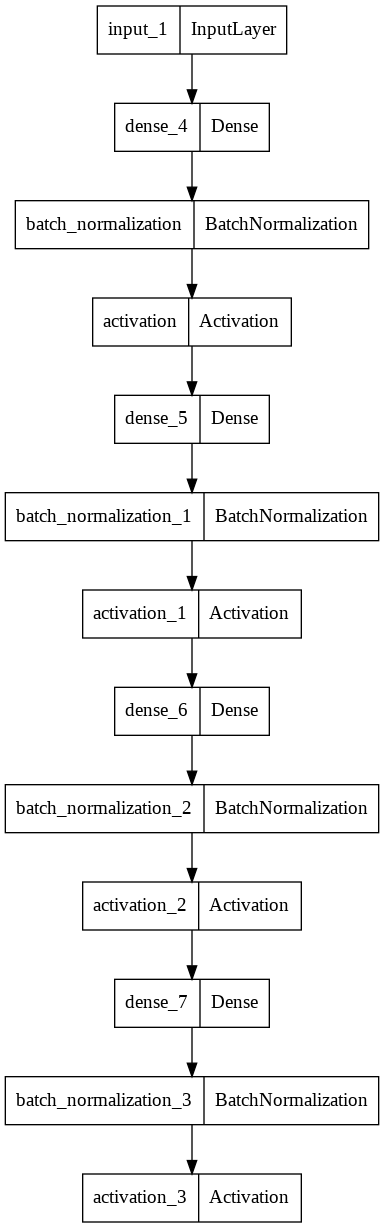

In [ ]:
tf.keras.utils.plot_model(model_func, to_file='model_func_batchnorm.png')

- Regularizer 2 : Early Stopping

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping # Regularizer

loss_fn = SparseCategoricalCrossentropy()
optim_fn = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stopping = EarlyStopping(verbose=1, patience=5)

In [ ]:
model.compile(optimizer=optim_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


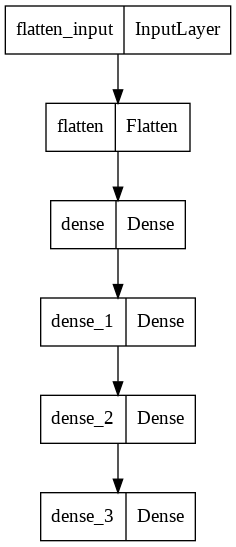

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png')

In [ ]:
hist = model.fit(x_train, 
                 y_train, 
                 epochs=30, 
                 validation_data=(x_valid, y_valid),
                 callbacks = [early_stopping]) # Regularizer

Epoch 1/30
1250/1250 [==============================] - 8s 5ms/step - loss: 1.9146 - accuracy: 0.3040 - val_loss: 1.8094 - val_accuracy: 0.3381
Epoch 2/30
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7151 - accuracy: 0.3823 - val_loss: 1.6919 - val_accuracy: 0.3897
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6316 - accuracy: 0.4143 - val_loss: 1.6791 - val_accuracy: 0.3819
Epoch 4/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5743 - accuracy: 0.4369 - val_loss: 1.6093 - val_accuracy: 0.4190
Epoch 5/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5358 - accuracy: 0.4487 - val_loss: 1.5363 - val_accuracy: 0.4510
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5023 - accuracy: 0.4607 - val_loss: 1.5683 - val_accuracy: 0.4424
Epoch 7/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4744 - accuracy: 0.4696 - val_loss: 1.5163 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Accuracy')

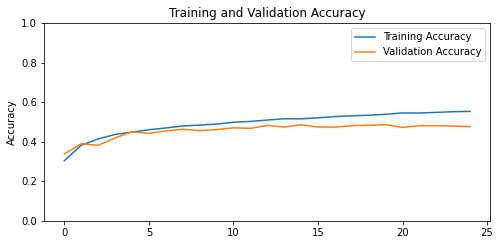

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')

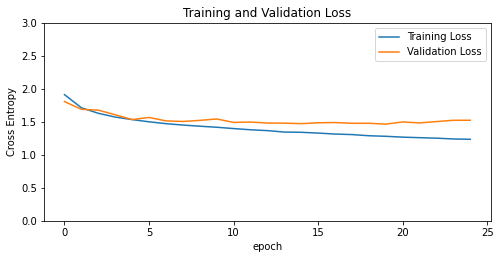

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Problem 2: 간단한 ResNet 구현
- 조건1: 1번째 ResBlock의 node는 100개, 2,3번째 ResBlock의 node는 200개를 사용한다.
- 조건2: 마지막 Layer의 node 수는 10개이다.
- 조건3: Activation은 모두 ReLU를 사용한다. 단, 마지막 layer에서는 Softmax activation을 사용한다.

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Add
import tensorflow as tf

In [ ]:
def ResBlock(x, nodes):
    ##################
    # Your code here
    ##################  
    x = Dense(nodes, activation='relu')(x)
    shortcut = x
    x = Dense(nodes, activation='relu')(x)
    x = Dense(nodes, activation='relu')(x)
    x = Add()([x, shortcut])

    ##################
    return x    

In [ ]:
def ResNet11():
    inputs = Input(shape=(224, 224, 3))    
    x = Flatten()(inputs)
    x = Dense(100)(x)
    ##################
    # Your code here
    ##################
    block1 = ResBlock(x, 100)
    block2 = ResBlock(block1, 200)
    block3 = ResBlock(block2, 200)
    
    outputs = Dense(10, activation='softmax')(block3)

    ##################
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
resnet11 = ResNet11()

In [ ]:
resnet11.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 flatten_1 (Flatten)            (None, 150528)       0           ['input_2[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 100)          15052900    ['flatten_1[0][0]']              
                                                                                                  
 dense_9 (Dense)                (None, 100)          10100       ['dense_8[0][0]']          

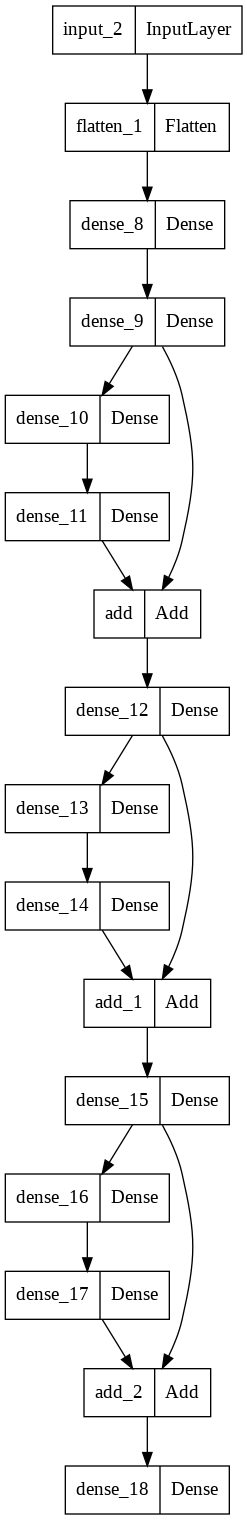

In [ ]:
tf.keras.utils.plot_model(resnet11, to_file='resnet11.png')